In [247]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline  
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import scipy.stats as st
from sklearn.metrics import classification_report
from statsmodels.tools import add_constant as add_constant
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

Anda adalah seorang Data Scientist yang bekerja di sebuah perusahaan retail yang ingin memahami perilaku pelanggan mereka dalam melakukan pembelian produk premium. Perusahaan memiliki data demografis pelanggan seperti User ID, Gender, Age, EstimatedSalary, dan apakah mereka melakukan pembelian produk premium (Purchased).

Tugas Anda:

Perusahaan ingin memprediksi apakah pelanggan akan melakukan pembelian produk premium berdasarkan usia mereka dan estimasi gaji yang dimiliki. Anda diminta untuk membuat model Logistic Regression untuk memprediksi variabel Purchased (0: Tidak membeli, 1: Membeli) dengan menggunakan data demografis pelanggan.

In [103]:
df = pd.read_csv("C:/Users/Owen/Downloads/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# EDA

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [108]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [110]:
Numerik = [Num for Num in df.columns if df[Num].dtypes != 'O']
Numerik

Category = [Var for Var in df.columns if df[Var].dtypes == 'O']
Category

['Gender']

### Numerik

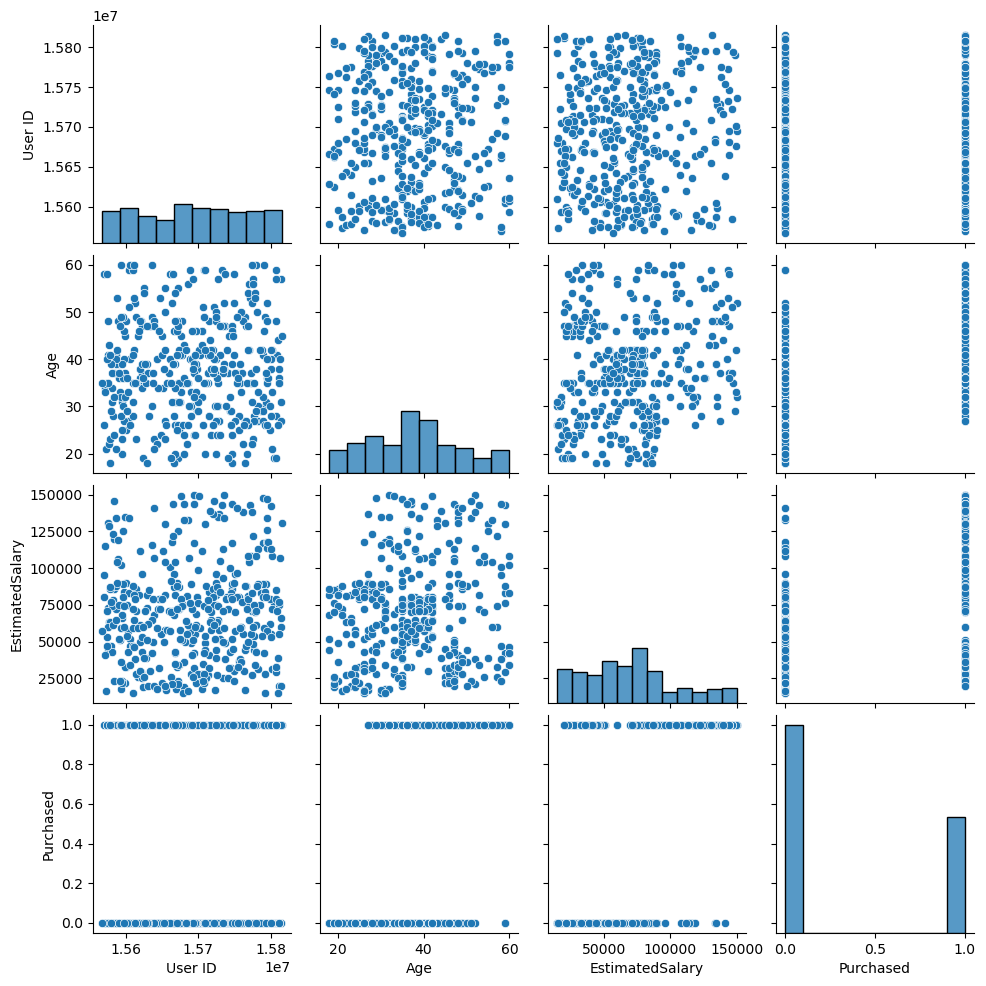

In [113]:
sns.pairplot(df)

In [114]:
df[Numerik].corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


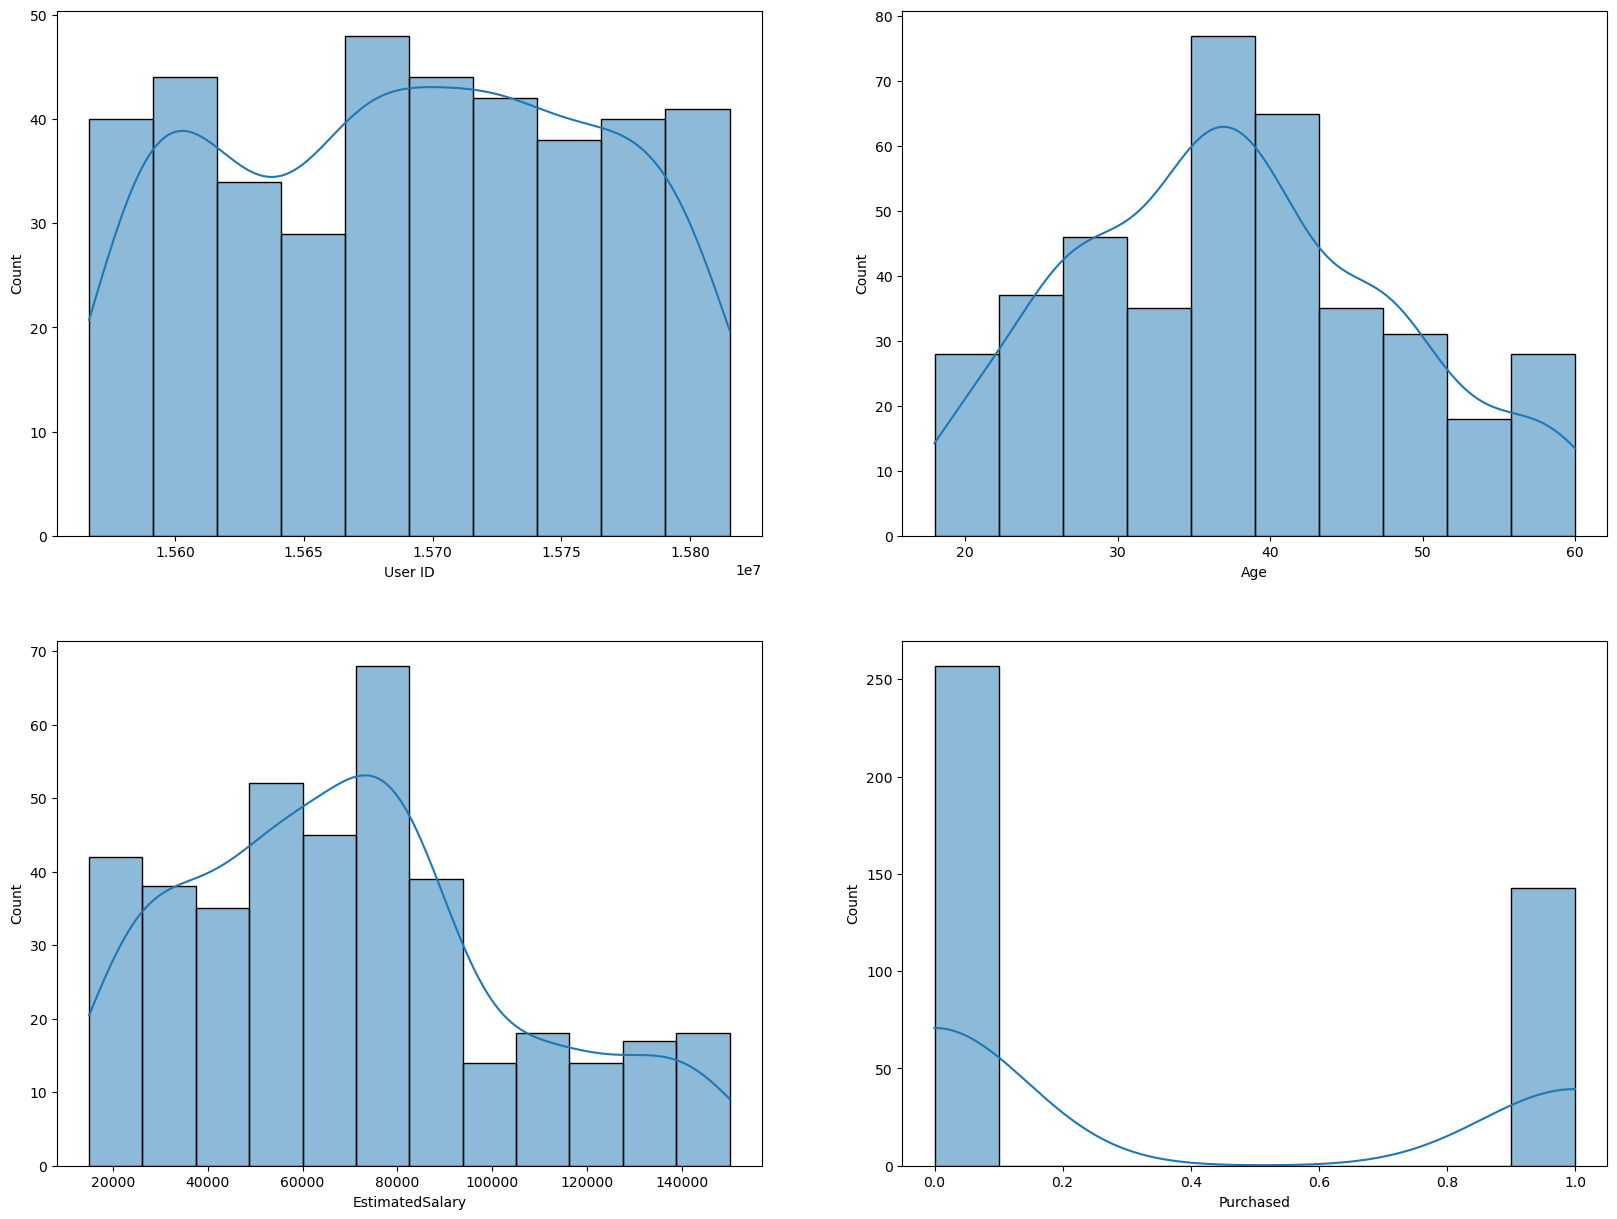

In [115]:
%matplotlib inline

fig,ax = plt.subplots(2,2, figsize=(20,15))
for i,col in enumerate(Numerik) :
    sns.histplot(df[col], kde=True, ax=ax[i//2, i%2])

Bisa terlihat bahwa sepertinya User ID, Age distribusi ya normal, tetapi EstimatedSalary itu skewed

In [117]:
df[Numerik].isnull().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Karena data Kosong noll maka kita tidak usah melakukan imputasi

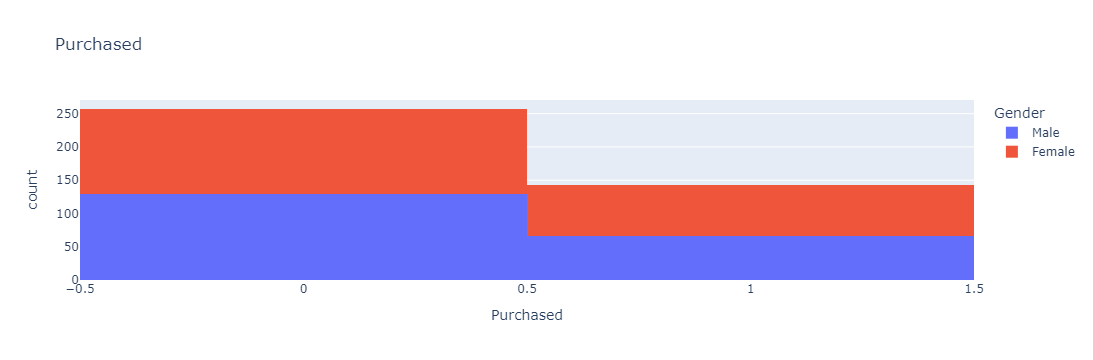

In [119]:
px.histogram(df, x='Purchased', color='Gender', title='Purchased')

<Axes: >

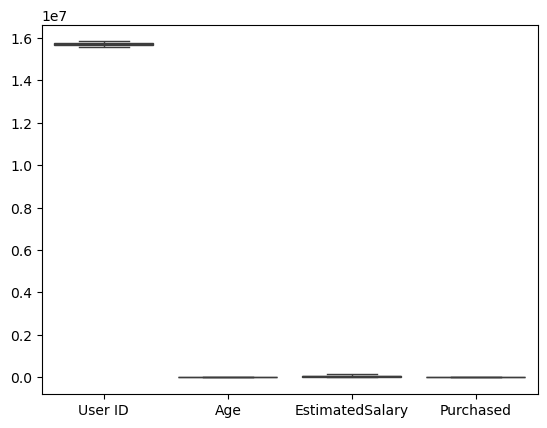

In [120]:
sns.boxplot(df)

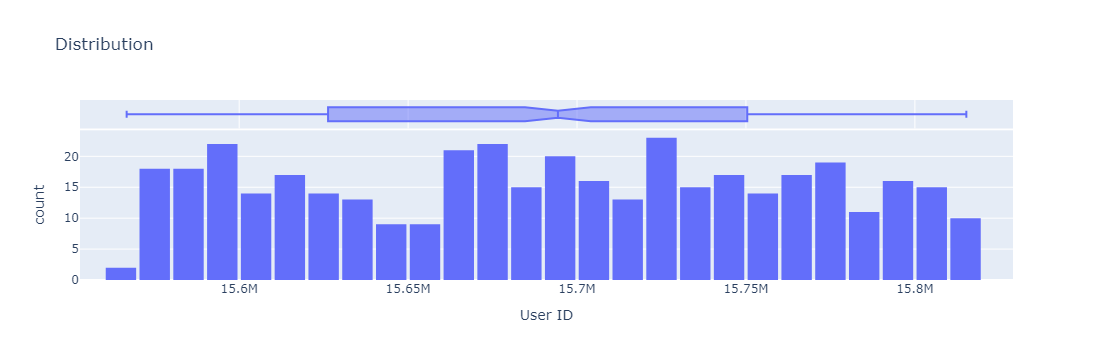

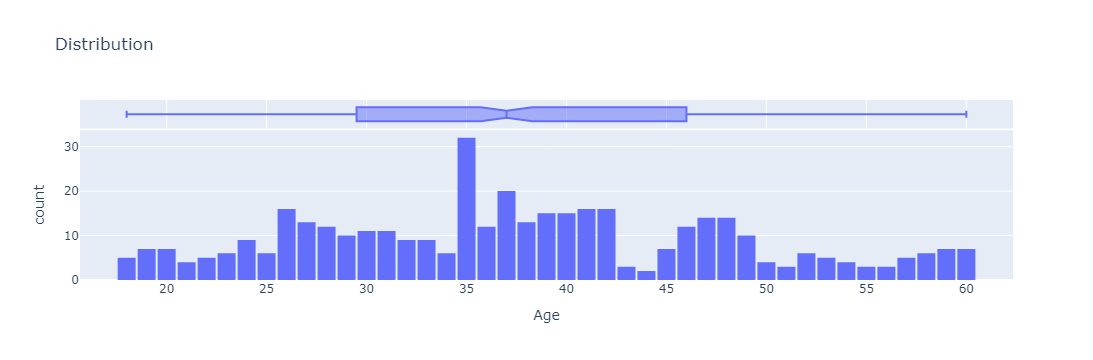

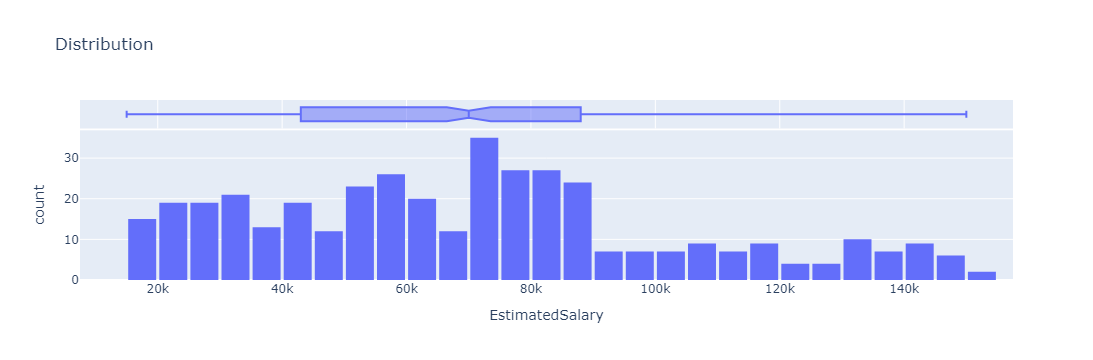

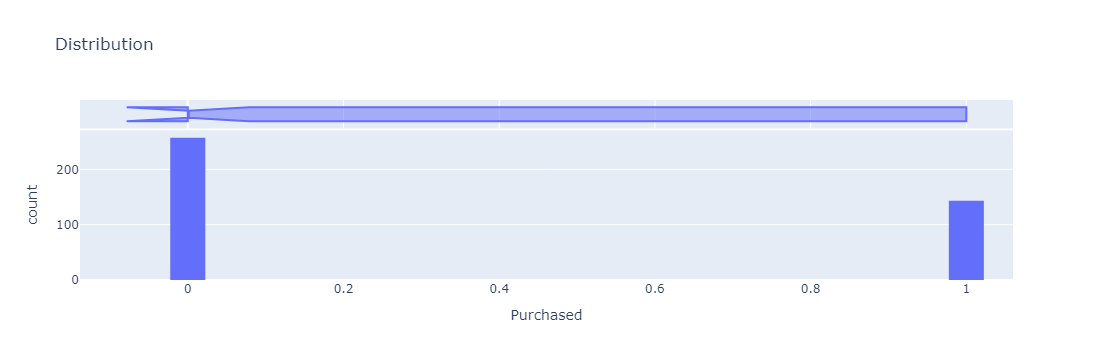

In [121]:
for i in Numerik :
    fig = px.histogram(df,
                x=df[i],
                 marginal='box',
                 nbins=47,
                 title = 'Distribution')
    fig.update_layout(bargap=0.1)
    fig.show()

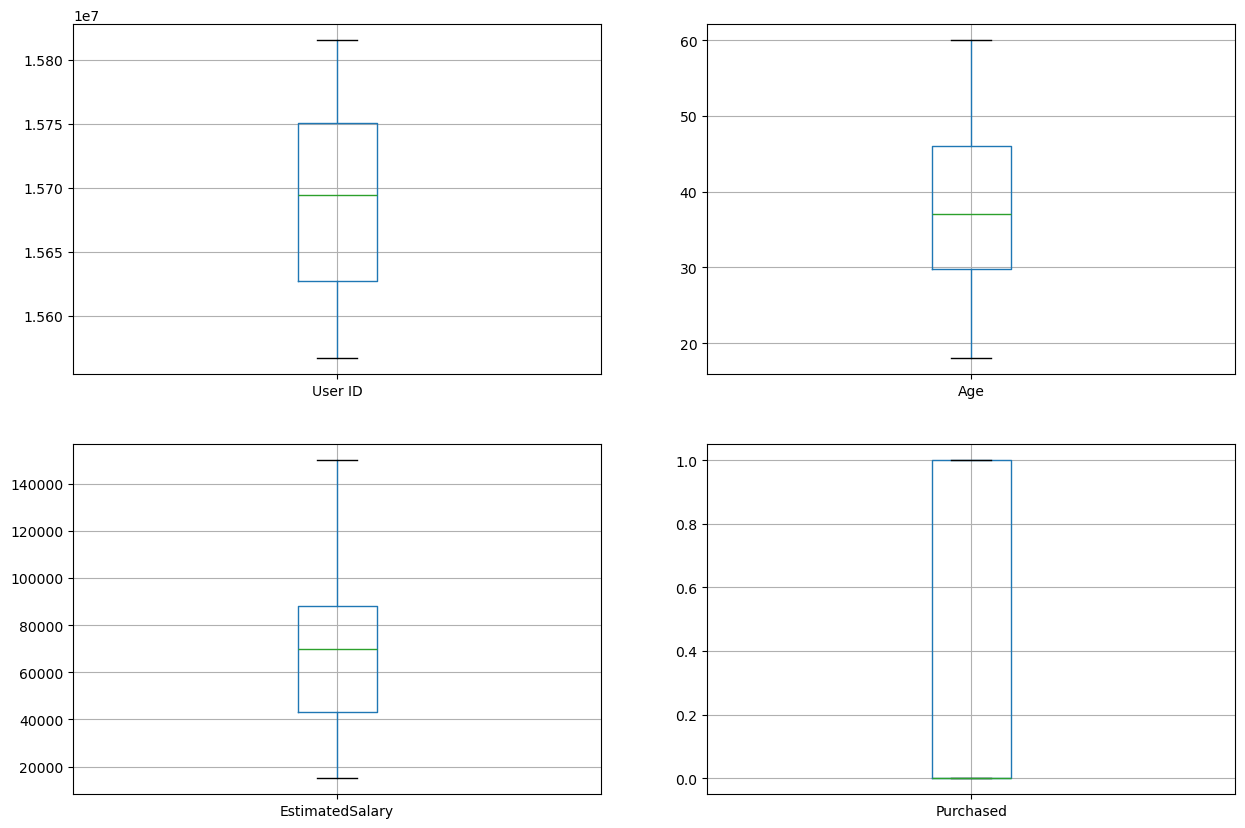

In [122]:
plt.figure(figsize=(15,10))
n = 0
for i in Numerik :
    n = n+1
    plt.subplot(2,2,n)
    fig = df.boxplot(i)
    fig.set_title('')
    fig.set_ylabel('')

#### Tidak ada OUTLIER

### Category

In [125]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [126]:
gender = {'Female' : 0, 'Male': 1, }
df['Gender'] = df.Gender.map(gender)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [127]:
df[Category].nunique()

Gender    2
dtype: int64

# Splitting

In [140]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [144]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [149]:
Feature = df.iloc[:,:-1]
Target = df.Purchased

X_train,X_test,y_train,y_test = train_test_split(Feature,Target,test_size=0.2,random_state=0)

In [153]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 4), (80, 4), (320,), (80,))

# Scalling

In [158]:
cols = X_train.columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train,columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [160]:
X_train

,User ID,Gender,Age,EstimatedSalary
0,0.387899,1.0,0.952381,0.955556
1,0.143973,0.0,0.976190,0.503704
2,0.323683,0.0,0.142857,0.296296
3,0.555972,0.0,0.190476,0.148148
4,0.678988,0.0,0.952381,0.170370
...,...,...,...,...
315,0.202871,0.0,0.714286,0.111111
316,0.854822,1.0,0.261905,0.207407
317,0.088731,1.0,0.428571,0.274074
318,0.841658,0.0,0.214286,0.288889


# Modeling

In [165]:
Model = LogisticRegression(solver='liblinear', random_state=0)
Model.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [211]:
Accuracy_Training = Model.predict(X_train)
Accuracy_Training

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,

In [213]:
a = Model.score(X_train,y_train)

In [215]:
b = Model.score(X_test,y_test)

In [217]:
c = pd.DataFrame({'Train Score' : [a],
            'Test Score' : [b]})
c

,Train Score,Test Score
0,0.8,0.9375


In [207]:
Model100 = LogisticRegression(C=100, solver='liblinear', random_state=0)
Model100.fit(X_train,y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [219]:
a = Model100.score(X_train,y_train)
b = Model100.score(X_test,y_test)
pd.DataFrame({'C100 Train' : [a],
                 'C100_Test' : [b]})

,C100 Train,C100_Test
0,0.83125,0.9125


In [221]:
Model01 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)
Model01.fit(X_train,y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [223]:
a = Model01.score(X_train,y_train)
b = Model01.score(X_test,y_test)
pd.DataFrame({'C100 Train' : [a],
                 'C100_Test' : [b]})

,C100 Train,C100_Test
0,0.621875,0.725


In [225]:
# Confussion Matrix

In [233]:
y_pred = Model.predict(X_test)

In [241]:
y_pred100 = Model100.predict(X_test)

In [239]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        58
           1       1.00      0.77      0.87        22

    accuracy                           0.94        80
   macro avg       0.96      0.89      0.92        80
weighted avg       0.94      0.94      0.93        80



In [243]:
print(classification_report(y_test,y_pred100))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



In [249]:
cm = confusion_matrix(y_test,y_pred)
print('True Positive (TP) : ', cm[0,0])
print('False Positive (FP) : ', cm[0,1])
print('True Negative (TN) : ', cm[1,1])
print('False Negative (FN) : ', cm[1,0])

True Positive (TP) :  58
False Positive (FP) :  0
True Negative (TN) :  17
False Negative (FN) :  5


In [259]:
y_pred_prob = Model.predict_proba(X_test)[:,:]
y_pred_prob

array([[0.78527713, 0.21472287],
       [0.68631187, 0.31368813],
       [0.74824371, 0.25175629],
       [0.78510722, 0.21489278],
       [0.7426606 , 0.2573394 ],
       [0.94745382, 0.05254618],
       [0.87979503, 0.12020497],
       [0.41309754, 0.58690246],
       [0.92792694, 0.07207306],
       [0.51953823, 0.48046177],
       [0.86429759, 0.13570241],
       [0.8831767 , 0.1168233 ],
       [0.7701312 , 0.2298688 ],
       [0.56071779, 0.43928221],
       [0.91498827, 0.08501173],
       [0.63787924, 0.36212076],
       [0.69396492, 0.30603508],
       [0.93219736, 0.06780264],
       [0.09339521, 0.90660479],
       [0.8612956 , 0.1387044 ],
       [0.74107761, 0.25892239],
       [0.18245313, 0.81754687],
       [0.62543958, 0.37456042],
       [0.3255737 , 0.6744263 ],
       [0.93092403, 0.06907597],
       [0.16263601, 0.83736399],
       [0.77243694, 0.22756306],
       [0.81114739, 0.18885261],
       [0.65541092, 0.34458908],
       [0.65954928, 0.34045072],
       [0.

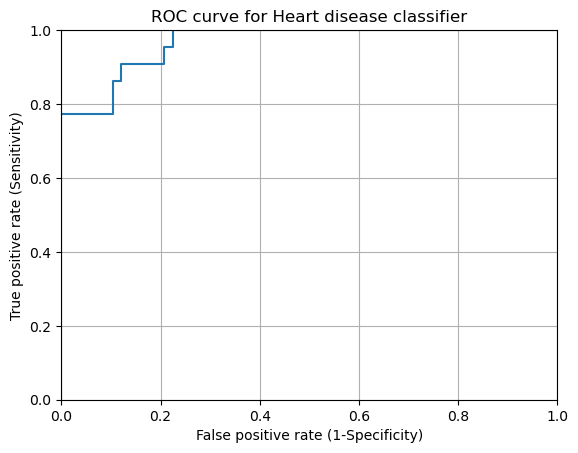

In [261]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [273]:
y_pred_prob_yes=Model.predict_proba(X_test)

In [267]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.9655172413793103

In [275]:
y_pred_prob = Model100.predict_proba(X_test)[:,:]
y_pred_prob

array([[0.88146734, 0.11853266],
       [0.83829498, 0.16170502],
       [0.80748653, 0.19251347],
       [0.92005455, 0.07994545],
       [0.90469616, 0.09530384],
       [0.99318763, 0.00681237],
       [0.98548444, 0.01451556],
       [0.23083881, 0.76916119],
       [0.99458253, 0.00541747],
       [0.45537875, 0.54462125],
       [0.96206724, 0.03793276],
       [0.97676353, 0.02323647],
       [0.84340252, 0.15659748],
       [0.57199225, 0.42800775],
       [0.98435223, 0.01564777],
       [0.69401292, 0.30598708],
       [0.71733415, 0.28266585],
       [0.9885669 , 0.0114331 ],
       [0.01035659, 0.98964341],
       [0.95780688, 0.04219312],
       [0.91016227, 0.08983773],
       [0.03722904, 0.96277096],
       [0.73523771, 0.26476229],
       [0.10712181, 0.89287819],
       [0.99571817, 0.00428183],
       [0.02770599, 0.97229401],
       [0.92426948, 0.07573052],
       [0.91784951, 0.08215049],
       [0.80611203, 0.19388797],
       [0.832255  , 0.167745  ],
       [0.

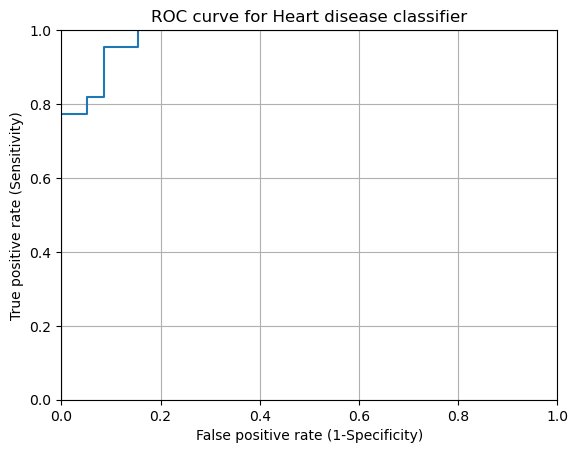

In [277]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [279]:
y_pred_prob_yes=Model100.predict_proba(X_test)

In [281]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.9788401253918495

In [269]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = Model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [271]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8281


Parameters that give the best results : 

 {'C': 100}


Estimator that was chosen by the search : 

 LogisticRegression(C=100, random_state=0, solver='liblinear')
